# Analiza rezultatov 44. maratona Franja
Ta zvezek vsebuje analizo podatkov o rezultatih vseh moških na 44.maratonu Franja leta 2025, pridobljenih s pomočjo skripte v mapi xxxx.

Analizirala sem:
- iz klubov, ki so imeli vsaj tri predstavnike, sem določila najboljše tri in seštela njihove čase
- razporeditev tekmovalcev po državah in najhitrejša država po povprečju
- histogram glede na čase z označenim povprečnim časom vseh tekmovalcev, ki so zaključili maraton
- kolko pocentov slovencev predstavlja nek klub klub
- klub z največ državami




In [1]:
from zajem_podatkov import main
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Če podatko še niso zajeti, odkomentiraj spodnji klic funkcije.
# main()

Najprej bomo za lažjo izvedbo analize v tabelo dodali še en stolpec, v katerega bomo zapisali rezultate tekmovalce v sekundah.

In [3]:
def cas_v_sekunde(rezultat):
    cas = rezultat.split(":")
    sekunde = int(cas[0]) * 60 * 60 + int(cas[1]) * 60 + float(cas[2])
    return sekunde 

In [4]:
podatki = pd.read_csv("podatki/rezultati.csv")
podatki["Sekunde"] = podatki["rezultat"].apply(cas_v_sekunde)

## Analiza rezultatov
Na začetku bomo analizirali rezultate tekmovalcev. Najprej bomo izdelali tabelo prvih desetih tekmovalcev, zadnjih petih tekmovalcev in njihovih časov. Nato pa bomo iz vseh rezultatov izračunali povprečen čas. S pomočjo črtnega diagrama bomo prikazali čase vseh tekmovalcev, ki so do konca pretekli maraton. Na diagramu bomo označili tudi povprečen čas, saj bomo tako lahko primerjali čase sodelujočih in povprečen čas.

In [5]:
tekmovalci = podatki["uvrstitev"]
casi = podatki["Sekunde"]
povprecje = sum(casi)/1042
podatki[["uvrstitev", "oseba", "rezultat"]].head(10)

,uvrstitev,oseba,rezultat
0,1,ZANETTI IGOR,3:34:45.8
1,2,POZZETTO FEDERICO,3:34:46.0
2,3,GROŠELJ MATIC,3:34:46.2
3,4,EMERŠIČ MARKO,3:34:46.6
4,5,MIKAC PATRIK,3:34:46.8
5,6,GAVAZZI ALBERTO,3:34:47.0
6,7,RINALDI MARCO,3:34:47.1
7,7,MULEC OŽBEJ,3:34:47.1
8,9,LAZZARINI LUCA,3:34:47.3
9,10,ZANETTI ENRICO,3:34:47.8


In [6]:
podatki[["uvrstitev", "oseba", "rezultat"]].tail(5)

,uvrstitev,oseba,rezultat
1038,1039,ŠPRUK JANEZ,7:01:44.2
1039,1040,GARTNAR GAŠPER,7:03:07.8
1040,1041,FILIPIČ PETER,7:26:39.1
1041,1042,PUST ROMAN,7:26:45.5
1042,1043,ORHON ECVET,7:36:32.5


Iz tabele lahko vidimo, da so prvi v cilj prišli skoraj istočasno, saj je med prvim in desetim mestom le dve sekundi razlike. Prav tako pa opazimo, da je med zadnjimi več razlike.

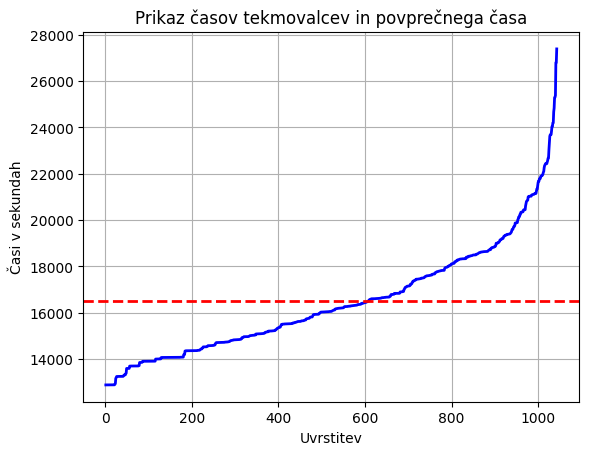

In [7]:
plt.plot(tekmovalci, casi, color="blue", linewidth=2, linestyle = "-")
plt.axhline(y = povprecje, color = "red", linestyle = "--", linewidth=2)
plt.ylabel("Časi v sekundah")
plt.xlabel("Uvrstitev")
plt.title("Prikaz časov tekmovalcev in povprečnega časa")
plt.grid(True)
plt.show()

Tudi na grafikonu se vidijo naša opažanja, saj je na začetko manj strm kot na koncu. Sama sem pričakovala, da bo črta s povprečjem nekoliko bolj na sredini, vendar se izkaže da je pod polovico.

## Analiza glede na države
Pri tej analizi bomo pogledali, katera država je imela največ predstavnikov in katera najmanj. Pričakujem, da bo največ tekmovalcev iz Slovenije, saj je tekmovanje potekalo v Sloveniji. Glede države z najmanj udeleženci pa težko napovemo katera bo, vendar sklepam, da bo kar nekaj držav, ki imajo samo enega predstavnika.

In [8]:
podatki_drzava = podatki["država"].value_counts()
podatki_drzava.head(10)

država
SLO    832
ITA     59
GBR     30
CRO     25
POL     19
AUT     17
HUN     11
GER     11
CZE      6
FRA      6
Name: count, dtype: int64

In [9]:
podatki_drzava.tail(10)

država
CAN    2
NED    1
SUI    1
MKD    1
HKG    1
RUS    1
USA    1
SRB    1
BIH    1
LTU    1
Name: count, dtype: int64

Tako je, naša napoved je bila pravilna. Največ je bilo kolesarjev domačinov, več držav pa je imelo le enega predstavnika. Porazdelitev tekmovalcev bomo v nadaljevnju predstavili s tortnim diagramom.

država
SLO       832
ITA        59
GBR        30
CRO        25
POL        19
AUT        17
HUN        11
GER        11
CZE         6
FRA         6
Ostalo     27
Name: count, dtype: int64


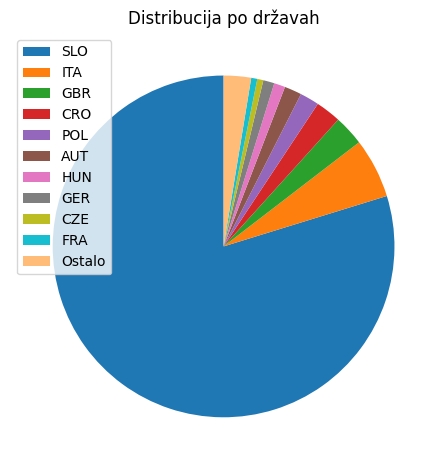

In [ ]:
podatki_drzava = podatki["država"].value_counts()
top_10_drzave = podatki_drzava.head(10)
ostalo = podatki_drzava.tail(-10).sum()

if ostalo > 0:
    top_10_drzave['Ostalo'] = ostalo

print(top_10_drzave)

top_10_drzave.plot(kind="pie",startangle=90, labels = None, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78'])
plt.title("Distribucija po državah")
plt.ylabel("")
plt.legend(top_10_drzave.index)
plt.tight_layout()
plt.show()


Kot drugo analizo pa si bomo pogledali povprečne rezultate držav. Najprej bomo izpisali tabelo tekmovalcev, njihove države in njihovega rezultata.

In [11]:
podatki[["oseba", "država", "rezultat"]]

,oseba,država,rezultat
0,ZANETTI IGOR,ITA,3:34:45.8
1,POZZETTO FEDERICO,ITA,3:34:46.0
2,GROŠELJ MATIC,SLO,3:34:46.2
3,EMERŠIČ MARKO,SLO,3:34:46.6
4,MIKAC PATRIK,SLO,3:34:46.8
...,...,...,...
1038,ŠPRUK JANEZ,SLO,7:01:44.2
1039,GARTNAR GAŠPER,SLO,7:03:07.8
1040,FILIPIČ PETER,SLO,7:26:39.1
1041,PUST ROMAN,SLO,7:26:45.5


In [12]:
podatki_drzava_sez = podatki["država"]
podatki_drzava_sez = podatki.drop(podatki[podatki["država"] == "&nbsp;"].index)

drzave = podatki_drzava_sez["država"].unique()
podatki_drzava_stevilo = podatki_drzava_sez["država"].value_counts()


In [26]:
drzava_vsota = {}
for drzava in drzave:
    trenutna_drzava = podatki_drzava_sez[podatki_drzava_sez["država"] == drzava]
    povprecje_po_drzavah = sum(trenutna_drzava["Sekunde"]) / podatki_drzava_stevilo[drzava]
    drzava_vsota[drzava] = povprecje_po_drzavah
drzava_urejene = sorted(drzava_vsota.items(), key=lambda vnos: vnos[1])
povprecje_urejeno = []
imena_urejeno = []
for drzava, cas in drzava_urejene:
    povprecje_urejeno.append(cas)
    imena_urejeno.append(drzava)
    print(drzava, "{:.2f}".format(cas))

NED 13700.80
SVK 13720.05
CZE 13876.03
SUI 13905.60
POL 14311.65
GER 14820.37
ITA 15018.10
MKD 15030.30
TUR 15107.60
HKG 15529.60
HUN 15572.84
BEL 15619.97
CRO 15755.92
FRA 15855.45
ESP 16018.10
RUS 16036.20
GBR 16395.00
EST 16445.95
AUT 16481.28
SLO 16728.45
USA 17510.80
SRB 18200.50
BIH 18477.00
CAN 18942.50
LTU 19205.20
CYP 19924.20


Dobili smo izpisane države in njihove povprečne čase. Spodaj pa smo te podatke predstavili še s diagramom, ki nam prikaže kako se povprečni časi držav višajo.

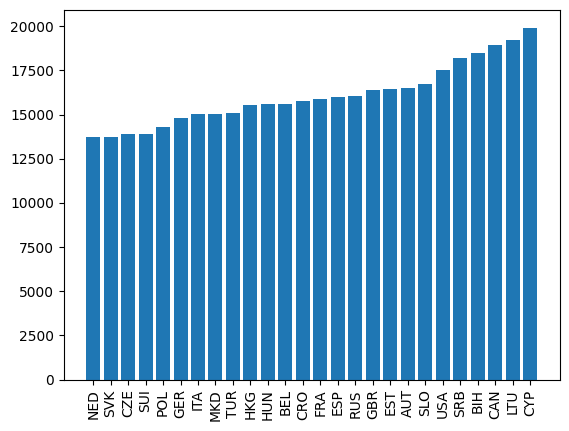

In [14]:
plt.bar(range(len(drzava_urejene)),povprecje_urejeno)
plt.xticks(range(len(drzava_urejene)),imena_urejeno, rotation = 90)
plt.show()

Pogledali si bomo tudi, kolikšen procent slovenskih tekmovalcev im klub.

In [15]:
slovenci = podatki.drop(podatki[podatki["država"] != "SLO"].index)

In [16]:
slovenci[["oseba", "država", "klub"]]

,oseba,država,klub
2,GROŠELJ MATIC,SLO,A2U bikes
3,EMERŠIČ MARKO,SLO,TEAM BTS Company
4,MIKAC PATRIK,SLO,TUŠ team
7,MULEC OŽBEJ,SLO,VITALGO.SI
12,KOVAČIČ MIRAN,SLO,a2u
...,...,...,...
1036,POŽAR MILAN,SLO,Rebel riders
1038,ŠPRUK JANEZ,SLO,VARUH ZDRAVJA
1039,GARTNAR GAŠPER,SLO,&nbsp;
1040,FILIPIČ PETER,SLO,&nbsp;


In [17]:
slovenci_s_klubom = slovenci.drop(slovenci[slovenci["klub"] == "&nbsp;"].index)
slovenci_s_klubom = slovenci_s_klubom.drop(slovenci_s_klubom[slovenci_s_klubom["klub"] == "/"].index)

In [18]:
slovenci_s_klubom[["oseba", "država", "klub"]]

,oseba,država,klub
2,GROŠELJ MATIC,SLO,A2U bikes
3,EMERŠIČ MARKO,SLO,TEAM BTS Company
4,MIKAC PATRIK,SLO,TUŠ team
7,MULEC OŽBEJ,SLO,VITALGO.SI
12,KOVAČIČ MIRAN,SLO,a2u
...,...,...,...
1032,PAVLIN SEBASTIJAN,SLO,ŠD Ficki
1033,BERANEK MATJAŽ,SLO,-
1034,JARC MATJAŽ,SLO,PGD Vodice
1036,POŽAR MILAN,SLO,Rebel riders


In [19]:
odstotek_slovencev_s_klubom = len(slovenci_s_klubom)/len(slovenci) * 100
print (f'Klub ima {odstotek_slovencev_s_klubom:.2f}% Slovencev.')

Klub ima 63.94% Slovencev.


## Analiza glede na klub
Tekmovalci so lahko povedali tudi za kateri klub tekmujejo. Pri tej analizi bomo najprej odstranli vse, ki ne zastopajo nobenega kluba. Potem pa bomo iz seznama vseh klubov odstranili še tiste, ki imajo manj kot tri tekmovalce ter nato pogledali seznam klubov, ki še ostanejo.

In [20]:
podatki_klub = podatki.drop(podatki[podatki["klub"] == "&nbsp;"].index)
podatki_klub = podatki_klub.drop(podatki_klub[podatki_klub["klub"] == "/"].index)

klubi = podatki_klub["klub"].unique()
for klub in klubi:
    if podatki["klub"].value_counts()[klub] < 3:
        podatki_klub = podatki_klub.drop(podatki_klub[podatki_klub["klub"] == klub].index)


In [21]:
print(podatki_klub["klub"].value_counts())

klub
KOLEKTOR                         34
London Dynamo                    30
ŠD GRMADA                        15
KD Rog                           11
VirtuSlo 4Endurance              11
Wolt                              9
[DRI:m] tim                       9
ŠKD SUPER POTENCIAL               9
Novak M                           8
Hella Saturnus                    8
UL Medicinska fakulteta           8
KD E.T. Jurovski Dol              7
RODEX MODRI DIRKAČI               7
MM Količevo                       7
ŠKD Energetika                    7
KK Rogla                          6
TUŠ team                          6
Kolesarski klub Postojna          6
Športno društvo ZT                6
DANIELI SPORTING CLUB             6
Hydro-Hit Team Artichokes         6
ŠD Koloka                         6
SIBO Group                        5
WALBET Team                       5
KD ROG                            5
LTH aktiv                         5
GOSTOL TST                        5
DOMEL                  

Torej sedaj bomo med klubi, ki imajo vsaj tri tekmovalce poiskali najhitrejšega, glede na njihove prve tri tekmovalce. Pri vsakem klubu bomo sešteli čase prvih treh in dobili najhitrejši klub.

In [22]:
klubi = podatki_klub["klub"].unique()
klub_vsota = {}
for klub in klubi:
    prvi_trije = podatki_klub[podatki_klub["klub"] == klub][:3]
    vsota_sekund_prvih_treh = sum(prvi_trije["Sekunde"])
    klub_vsota[klub] = vsota_sekund_prvih_treh

for klub, cas in sorted(klub_vsota.items(), key=lambda vnos: vnos[1])[:10]:
    print(klub,cas)

VITALGO.SI 40082.5
TUŠ team 40156.4
NEW LIMITS MONTURANESE 40445.2
Team Granfondo Slovenija 41030.8
Škola biciklizma Zagreb 41237.3
KD Sloga 1902 Idrija 41257.3
The Bonk Squad 41483.9
London Dynamo 41491.5
WALBET Team 42051.8
VirtuSlo 4Endurance 42087.3


Najhitrejši klub je bil VITALGO.SI, sledi pa mu TUŠ team. 

Poglejmo še kateri klubi imajo več različnih držav.

In [23]:
podatki_klub = podatki.drop(podatki[podatki["klub"] == "&nbsp;"].index)
podatki_klub = podatki_klub.drop(podatki_klub[podatki_klub["klub"] == "/"].index)
klubi = podatki_klub["klub"].unique()
for klub in klubi:
    trenutni_klub = podatki_klub[podatki_klub["klub"] == klub]
    stevilo_drzav = len(trenutni_klub["država"].unique())
    if stevilo_drzav > 1:
        print (klub,stevilo_drzav)


Team Granfondo Slovenija 2
Škola biciklizma Zagreb 2
London Dynamo 3
Lesnina 2


## Zaključek
Ta analiza poduja pregled sodelujočih moških na maratonu franja 2025. Analiza nam pove nekaj o državah, klubih in rezultatih tekmovalcev. 